In [4]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

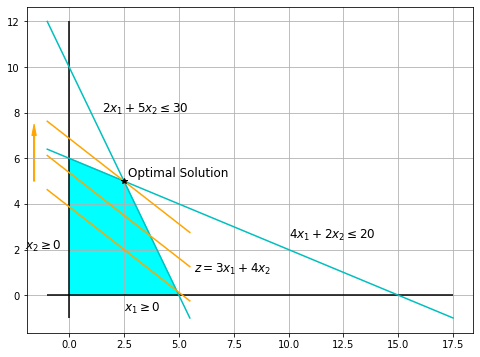

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0], 
                                 [0, 6], 
                                 [2.5, 5], 
                                 [5, 0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp

In [7]:
from scipy.integrate import odeint

In [8]:
pop_size = 3.3e8
γ = 1 / 18
σ = 1 / 5.2

In [9]:
def F(x, t, R0=1.6):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di

In [10]:
# initial conditions of s, e, i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0

In [12]:
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.

    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path


In [13]:
#homework
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

In [1]:
from quantecon.markov import DiscreteDP
aiyagari_ddp = DiscreteDP(R, Q, beta)
results = aiyagari_ddp.solve(method='policy_iteration')

NameError: name 'R' is not defined

In [2]:
from quantecon.markov import DiscreteDP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import root
import time 
import sympy
beta=0.95
delta=0.05
alpha=0.3
k=0
x=sympy.Symbol('x')
k=sympy.solve(k**alpha+(1-delta)*x-beta*(alpha*((x)**(alpha-1))+(1-delta))*(x**alpha+(1-delta)*x-x),x)
print(k)

[1.21059096994885]
